INSURANCE CLAIM FRAUD DETECTION

Project Description


Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
This dataset has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

Objective-

To predict if an insurance claim is fraudulent or not. 
  



In [1]:
#Importing necessary libraries-
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Reading dataset
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')

In [3]:
data.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... police_report_available total_claim_amount injury_claim  \
0       466132  ...                     YES              71610         6510   
1       468176  ...                       ?               5070          780   
2       430632  ...                      NO              34650         7700   
3       608117  ...                      NO              63400         6340   
4       610706  ...                      NO               6500         1300   

  property_claim vehicle_claim  auto_make  auto_model auto_year  \
0          13020         52080       Saab         92x      2004   
1            780          3510   Mercedes        E400      2007   
2           3850         23100      Dodge         RAM      2007   
3           6340         50720  Chevrolet       Tahoe      2014   
4            650          4550     Accura         RSX      2009   

  fraud_reported _c39  
0              Y  NaN  
1              Y  NaN  
2              N  NaN  
3              Y  NaN  
4              N  NaN  

[5 rows x 40 columns]

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [5]:
#Checking random samples
data.sample(15)

months_as_customer  age  policy_number policy_bind_date policy_state  \
777                 239   40         488724       29-11-2004           IN   
452                 101   33         552788       03-09-1991           IL   
771                 209   39         362407       06-12-1996           IN   
114                 390   51         143626       29-09-1999           OH   
238                 272   41         280709       06-05-1991           OH   
767                 253   46         247505       19-04-2006           IL   
954                 246   39         354455       19-04-2007           IN   
703                 270   41         639027       21-06-1994           IL   
613                  75   27         831053       05-08-1992           IN   
26                  257   43         863236       20-09-1990           IN   
198                 328   48         630226       10-12-2005           IL   
501                  26   39         493161       30-01-1992           IN   
497                   0   32         740518       18-02-2011           OH   
337                 159   37         106873       28-08-1998           IL   
653                 109   29         488464       01-10-2006           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
777    100/300                500                1463.95               0   
452   500/1000               1000                1313.64               0   
771    100/300                500                1264.99               0   
114    250/500               2000                1124.38               0   
238   500/1000               2000                1608.34               0   
767    100/300                500                1358.20               0   
954    250/500               1000                1416.08               0   
703    250/500               1000                 817.28               0   
613    250/500               1000                1202.75               0   
26     100/300               2000                1322.10               0   
198    250/500                500                1411.43               0   
501    250/500               1000                 770.76               0   
497   500/1000               1000                1377.04               0   
337   500/1000               1000                 894.40               0   
653    100/300               2000                1007.28         6000000   

     insured_zip insured_sex insured_education_level insured_occupation  \
777       430567      FEMALE                      JD              sales   
452       438617      FEMALE                 College    priv-house-serv   
771       614169        MALE                     PhD   transport-moving   
114       618316        MALE               Associate       armed-forces   
238       466718      FEMALE               Associate    farming-fishing   
767       477636      FEMALE                      MD   transport-moving   
954       612546      FEMALE                      JD       craft-repair   
703       460263        MALE             High School              sales   
613       602289        MALE             High School  handlers-cleaners   
26        436984        MALE             High School     prof-specialty   
198       464874        MALE                 Masters       armed-forces   
501       433155        MALE                 Masters       tech-support   
497       441363        MALE                 College       tech-support   
337       446435        MALE               Associate       tech-support   
653       457727      FEMALE             High School       adm-clerical   

    insured_hobbies insured_relationship  capital-gains  capital-loss  \
777       skydiving            own-child              0             0   
452     board-games            unmarried          12100             0   
771            polo              husband          67800             0   
114         reading       other-relative              0       

In [7]:
#Checking shape of data
data.shape

(1000, 40)

In [8]:
#Checking daty types and nulls-
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

We can see that majority of the columns have oject type data and except _c39, none of the columns have null values.




In [9]:
#Let's confirm for nulls
data.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [6]:
#Since _c39 has no data at all, it is better to remove it
data.drop(columns=['_c39'], inplace=True)

In [7]:
data.shape

(1000, 39)

In [12]:
#Let's check unique values
data.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [15]:
data['fraud_reported'].unique()

array(['Y', 'N'], dtype=object)

In [16]:
data['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [17]:
data['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [18]:
data['bodily_injuries'].unique()

array([1, 0, 2], dtype=int64)

In [19]:
data['policy_deductable'].unique()

array([1000, 2000,  500], dtype=int64)

In [20]:
data['incident_city'].unique()

array(['Columbus', 'Riverwood', 'Arlington', 'Springfield', 'Hillsdale',
       'Northbend', 'Northbrook'], dtype=object)

In [21]:
data['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

There are three more variables whoch have missing values however, the missing values appear as '?' here. This needs to be addressed later

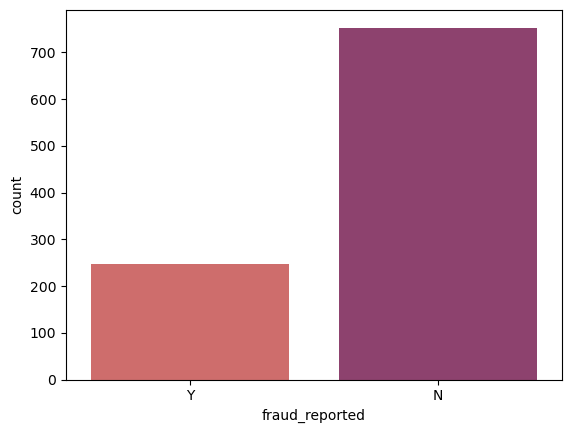

In [34]:
#Let's check distribution of fraud reported-
sns.countplot(x='fraud_reported', data=data, palette='flare')
plt.show()

The count of number of non-fraudulent claims are way higher than number of fraudulent claims

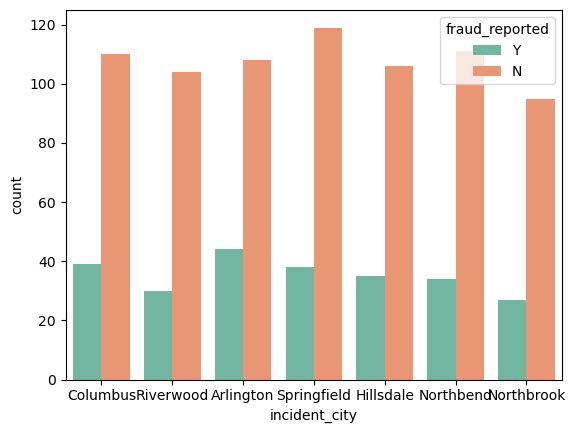

In [36]:
#Let's check count of claims made in each city as per fraud reported
sns.countplot(x='incident_city', hue='fraud_reported', data=data, palette='Set2')
plt.show()

Highest number of insurance claims were made in SpringField city and the lowest ones are reported in Northbrook.

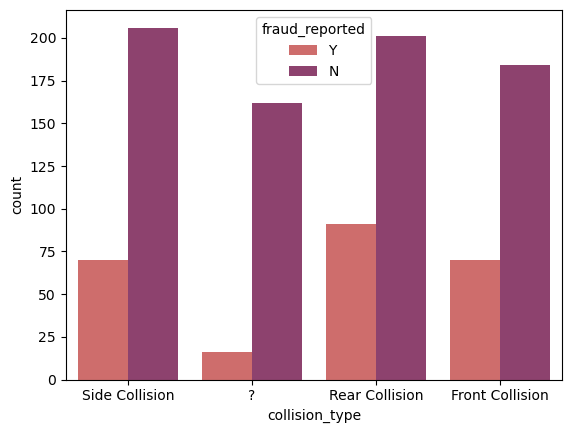

In [38]:
#Let's check collisions made as per fraud reported
sns.countplot(x='collision_type', hue='fraud_reported', data=data, palette='flare')
plt.show()

We can see that a large amount of missing data is there showing under '?' and Rear collisions are the most commonly occuring collisions in case of accidents

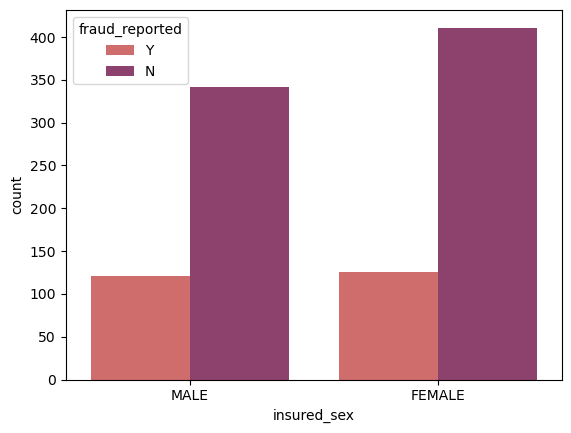

In [39]:
#Let's check count of insured sex as per fraud reported
sns.countplot(x='insured_sex', data=data, hue='fraud_reported', palette='flare')
plt.show()

There are more female policy holders than male

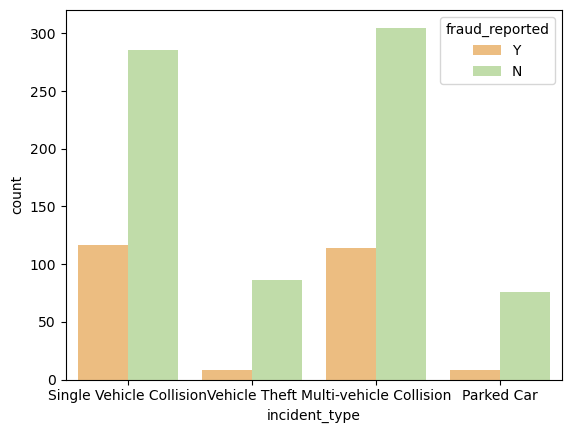

In [40]:
#Let's check count of incident type with respect to fraud reported
sns.countplot(x='incident_type', hue='fraud_reported', data=data, palette='Spectral')
plt.show()

Multi vehicle collision is the most reported case for accidents and seems to be least fraudulent and accidents with parked car has been least reported. 

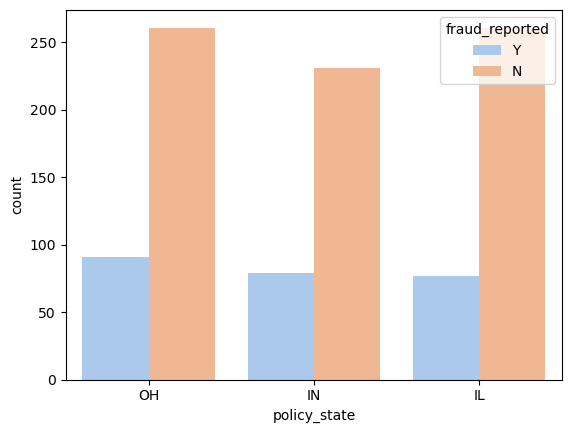

In [41]:
#Let's check count of policy state
sns.countplot(x='policy_state', hue='fraud_reported', data=data, palette='pastel')
plt.show()

IL appears to be the state with highest number of claims that are non- fraudulent

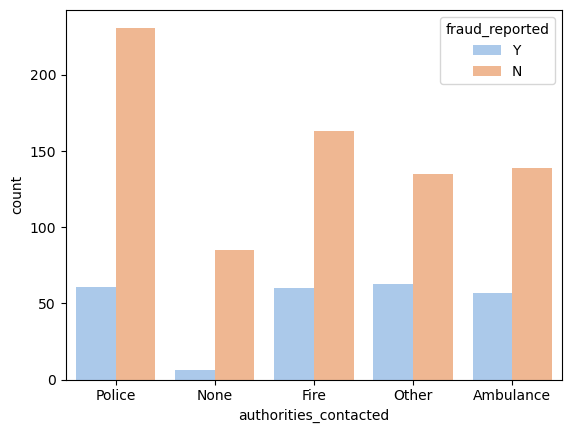

In [48]:
#Let's check count of authorities_contacted with respect to fraud reported
sns.countplot(x='authorities_contacted', hue='fraud_reported', data=data, palette='pastel')
plt.show()

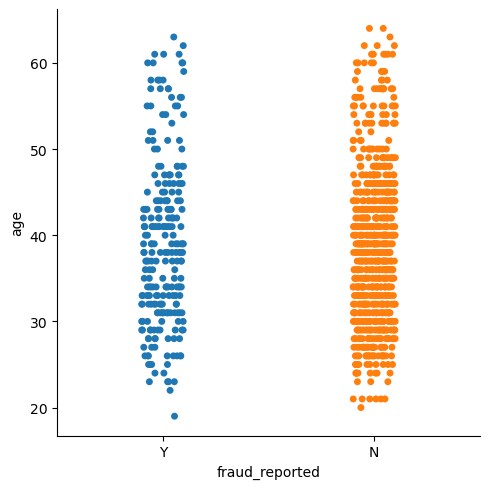

In [43]:
#Agewise fraud reported
sns.catplot(x='fraud_reported', y='age', data=data, hue='fraud_reported')
plt.show()

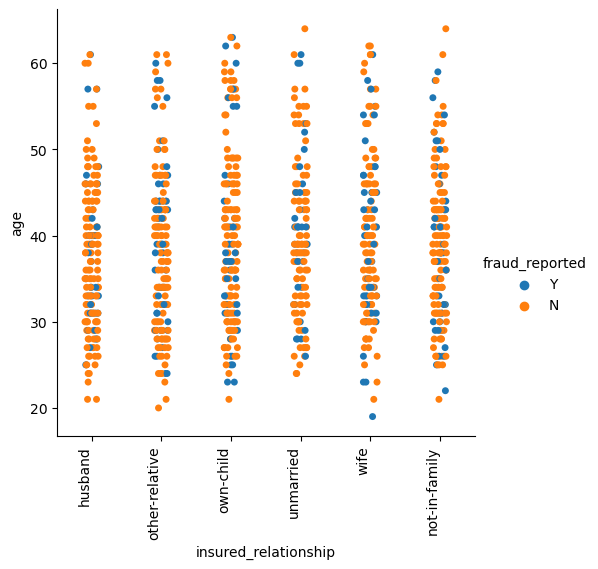

In [55]:
#Agewise insured relationship with respect to fraud reported
sns.catplot(x='insured_relationship', y='age', data=data, hue='fraud_reported')
plt.xticks(rotation=90, ha='right')
plt.show()

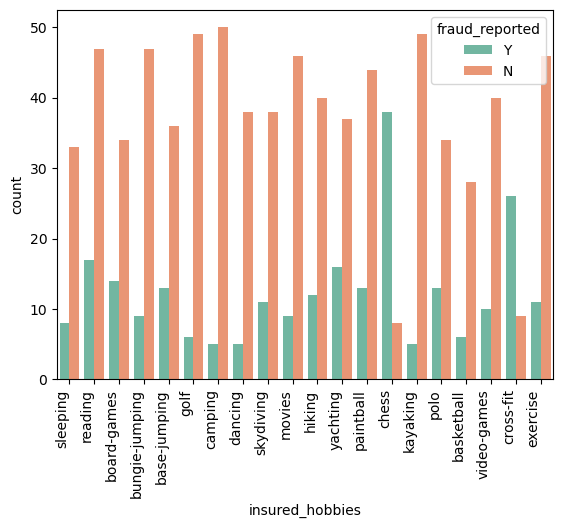

In [58]:
#Checking count of insured people with hobby with respect to fraud reported
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=data, palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.show()

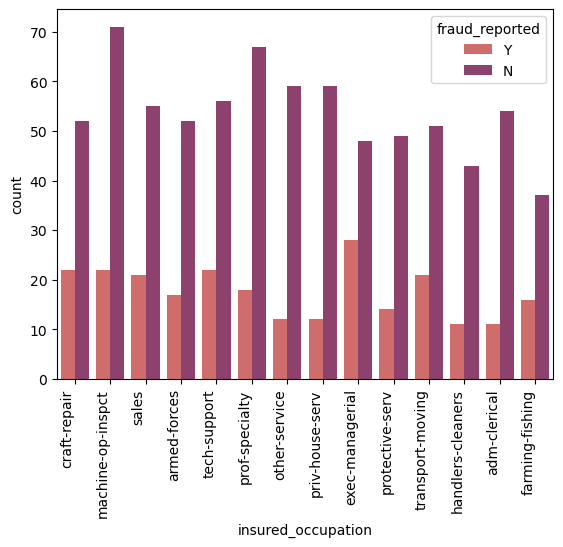

In [61]:
#Checking count of insured occupation with respect to fraud reported
sns.countplot(x='insured_occupation', hue='fraud_reported', data=data, palette='flare')
plt.xticks(rotation=90, ha='right')
plt.show()

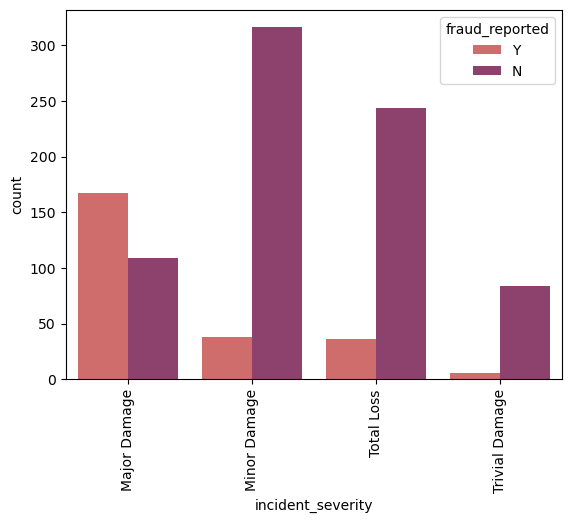

In [62]:
#Checking incident severity with respect to fraud reported
sns.countplot(x='incident_severity', hue='fraud_reported', data=data, palette='flare')
plt.xticks(rotation=90)
plt.show()

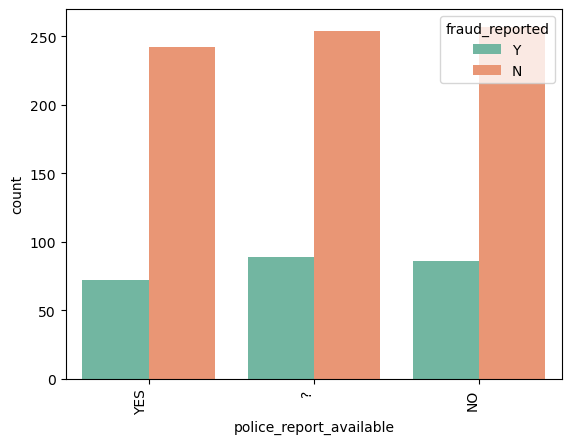

In [63]:
#Checking police_report_available with respect to fraud reported
sns.countplot(x='police_report_available', hue='fraud_reported', data=data, palette='Set2')
plt.xticks(rotation=90, ha='right')
plt.show()

In [8]:
#Handelling Nulls 
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values='?', strategy="most_frequent")

In [9]:
List=['police_report_available','collision_type','property_damage']


In [10]:
for i in List:
    data[i]=SI.fit_transform(data[i].values.reshape(-1,1))

In [11]:
data['police_report_available'].unique()

array(['YES', 'NO'], dtype=object)

In [12]:
data['collision_type'].unique()

array(['Side Collision', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [13]:
data['property_damage'].unique()

array(['YES', 'NO'], dtype=object)

All the missing values in the form of '?' have now been treated

In [14]:
#Converting Object data type into numericals-
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [16]:
object_data=['policy_bind_date', 'policy_state',
       'policy_csl','policy_annual_premium',
       'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship',
       'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'property_damage','police_report_available',
       'auto_make', 'auto_model', 'fraud_reported','policy_bind_date','incident_date','incident_location']

In [17]:
for i in object_data:
    data[i]=le.fit_transform(data[i])

In [18]:
data.dtypes

months_as_customer             int64
age                            int64
policy_number                  int64
policy_bind_date               int64
policy_state                   int32
policy_csl                     int32
policy_deductable              int64
policy_annual_premium          int64
umbrella_limit                 int64
insured_zip                    int64
insured_sex                    int32
insured_education_level        int32
insured_occupation             int32
insured_hobbies                int32
insured_relationship           int32
capital-gains                  int64
capital-loss                   int64
incident_date                  int32
incident_type                  int32
collision_type                 int32
incident_severity              int32
authorities_contacted          int32
incident_state                 int32
incident_city                  int32
incident_location              int32
incident_hour_of_the_day       int64
number_of_vehicles_involved    int64
p

All the variables are now have numerical values

In [84]:
#Let's check more details about the data
data.describe()

months_as_customer          age  policy_number  policy_bind_date  \
count         1000.000000  1000.000000    1000.000000       1000.000000   
mean           203.954000    38.948000  546238.648000        474.332000   
std            115.113174     9.140287  257063.005276        275.402851   
min              0.000000    19.000000  100804.000000          0.000000   
25%            115.750000    32.000000  335980.250000        233.750000   
50%            199.500000    38.000000  533135.000000        472.500000   
75%            276.250000    44.000000  759099.750000        713.250000   
max            479.000000    64.000000  999435.000000        950.000000   

       policy_state   policy_csl  policy_deductable  policy_annual_premium  \
count    1000.00000  1000.000000        1000.000000            1000.000000   
mean        1.01400     0.951000        1136.000000             495.735000   
std         0.83096     0.804516         611.864673             285.876467   
min         0.00000     0.000000         500.000000               0.000000   
25%         0.00000     0.000000         500.000000             247.750000   
50%         1.00000     1.000000        1000.000000             496.500000   
75%         2.00000     2.000000        2000.000000             742.250000   
max         2.00000     2.000000        2000.000000             990.000000   

       umbrella_limit    insured_zip  insured_sex  insured_education_level  \
count    1.000000e+03    1000.000000  1000.000000              1000.000000   
mean     1.101000e+06  501214.488000     0.463000                 2.966000   
std      2.297407e+06   71701.610941     0.498879                 1.948497   
min     -1.000000e+06  430104.000000     0.000000                 0.000000   
25%      0.000000e+00  448404.500000     0.000000                 1.000000   
50%      0.000000e+00  466445.500000     0.000000                 3.000000   
75%      0.000000e+00  603251.000000     1.000000                 5.000000   
max      1.000000e+07  620962.000000     1.000000                 6.000000   

       insured_occupation  insured_hobbies  insured_relationship  \
count         1000.000000      1000.000000           1000.000000   
mean             6.653000         9.731000              2.416000   
std              4.019048         5.674049              1.681003   
min              0.000000         0.000000              0.000000   
25%              3.000000         5.000000              1.000000   
50%              7.000000        10.000000              2.000000   
75%             10.000000        15.000000              4.000000   
max             13.000000        19.000000              5.000000   

       capital-gains   capital-loss  incident_date  incident_type  \
count    1000.000000    1000.000000    1000.000000    1000.000000   
mean    25126.100000  -26793.700000      29.376000       1.172000   
std     27872.187708   28104.096686      17.249875       1.081474   
min         0.000000 -111100.000000       0.000000       0.000000   
25%         0.000000  -51500.000000      14.750000       0.000000   
50%         0.000000  -23250.000000      29.500000       1.000000   
75%     51025.000000       0.000000      44.000000       2.000000   
max    100500.000000       0.000000      59.000000       3.000000   

       collision_type  incident_severity  authorities_contacted  \
count     1000.000000        1000.000000            1000.000000   
mean         1.022000           1.184000               2.167000   
std          0.728043           0.939695               1.532142   
min          0.000000           0.000000               0.000000   
25%          0.000000           0.000000               1.000000   
50%          1.000000           1.000000               2.000000   
75%          2.000000           2.000000               4.000000   
max          2.000000           3.000000               4.000000   

       incident_state  incident_city  incident_location  \
count     1000.000000    10

Observations-

1. There are no null values present in any of the variables.

2. The standard deviation range of 0.43 to range as high as 257063.005276 implies that the scale of distribution has a lot of variation.

3. Few variables like injury_claim, total_claim_amount, capital-gains etc, have high difference in 75% and max which clearly indicated the presence of outliers.

4. The distribution of most variables seem normal.

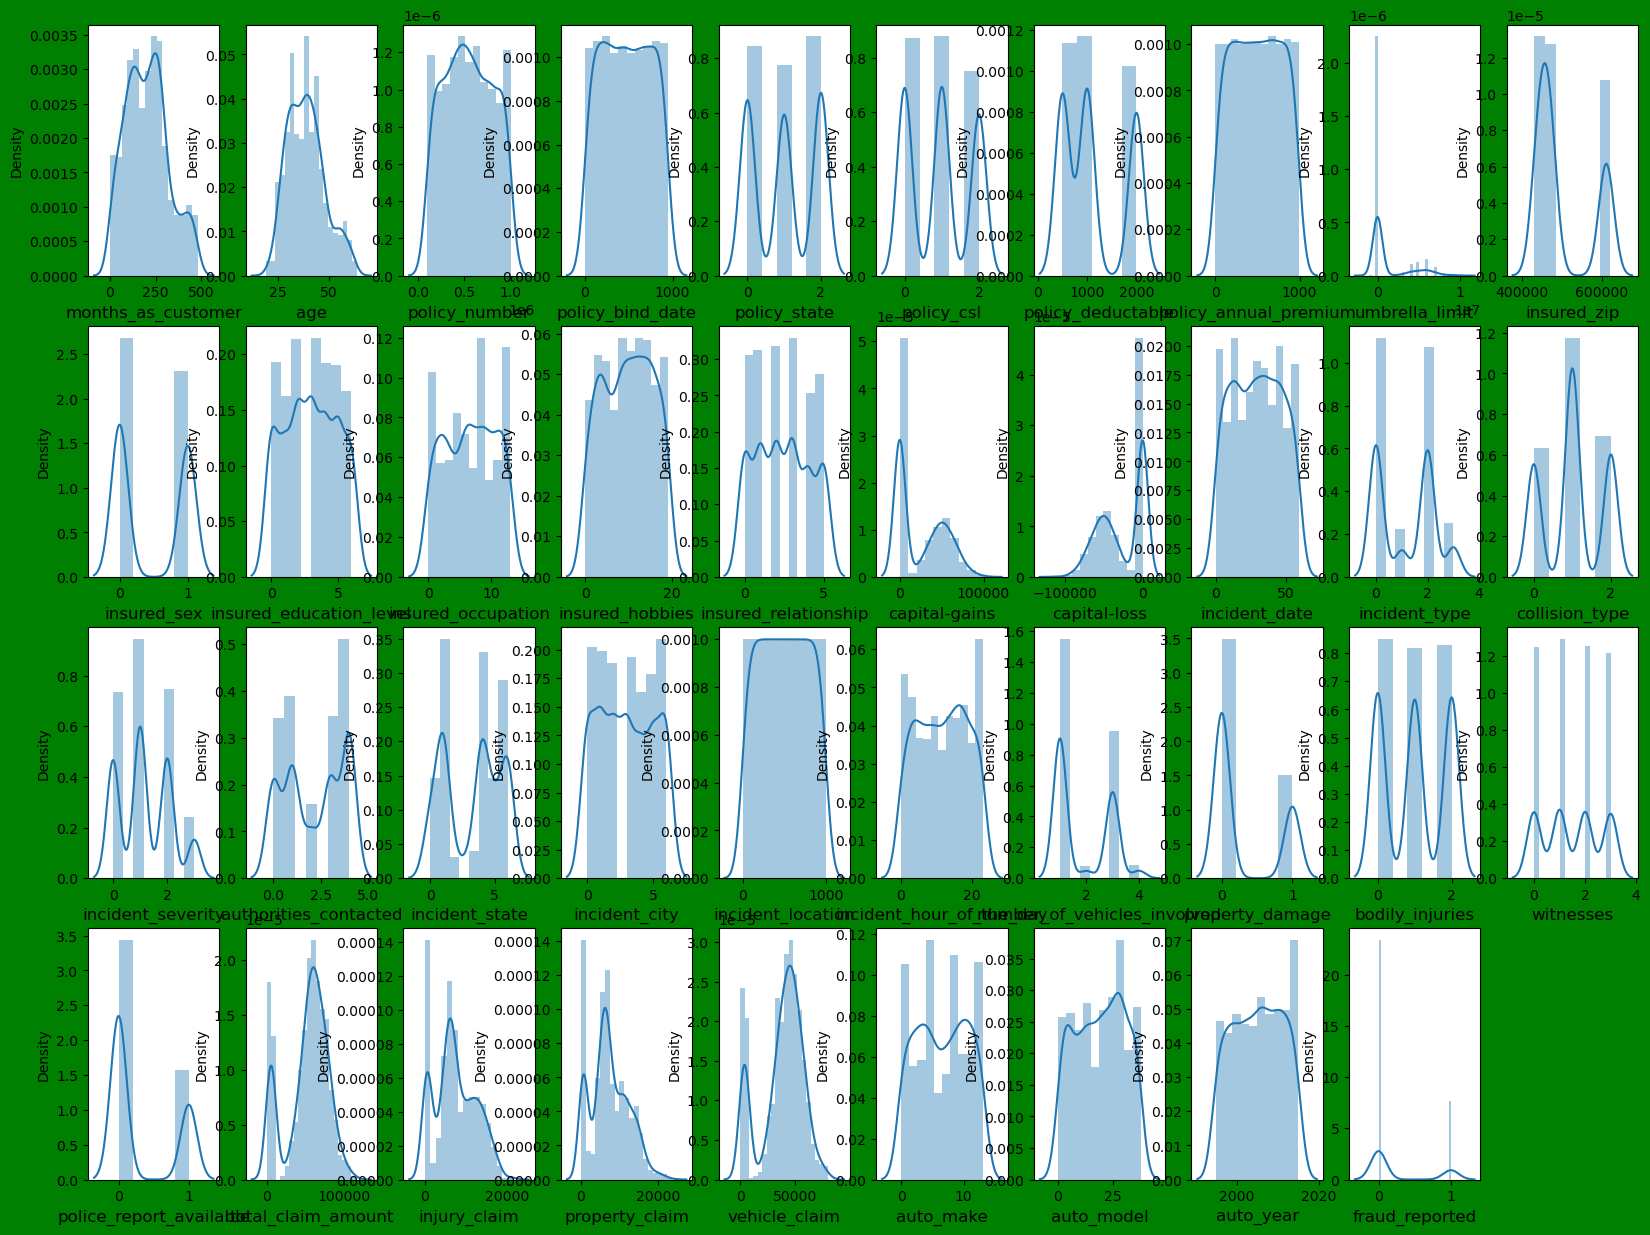

In [87]:
#Let's check distribution of data-
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in data:
    if plotnumber<=39:
        ax=plt.subplot(4,10, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()

Umbrella Limit seems to be skewed. Distribution in the rest of the variables seems normal.

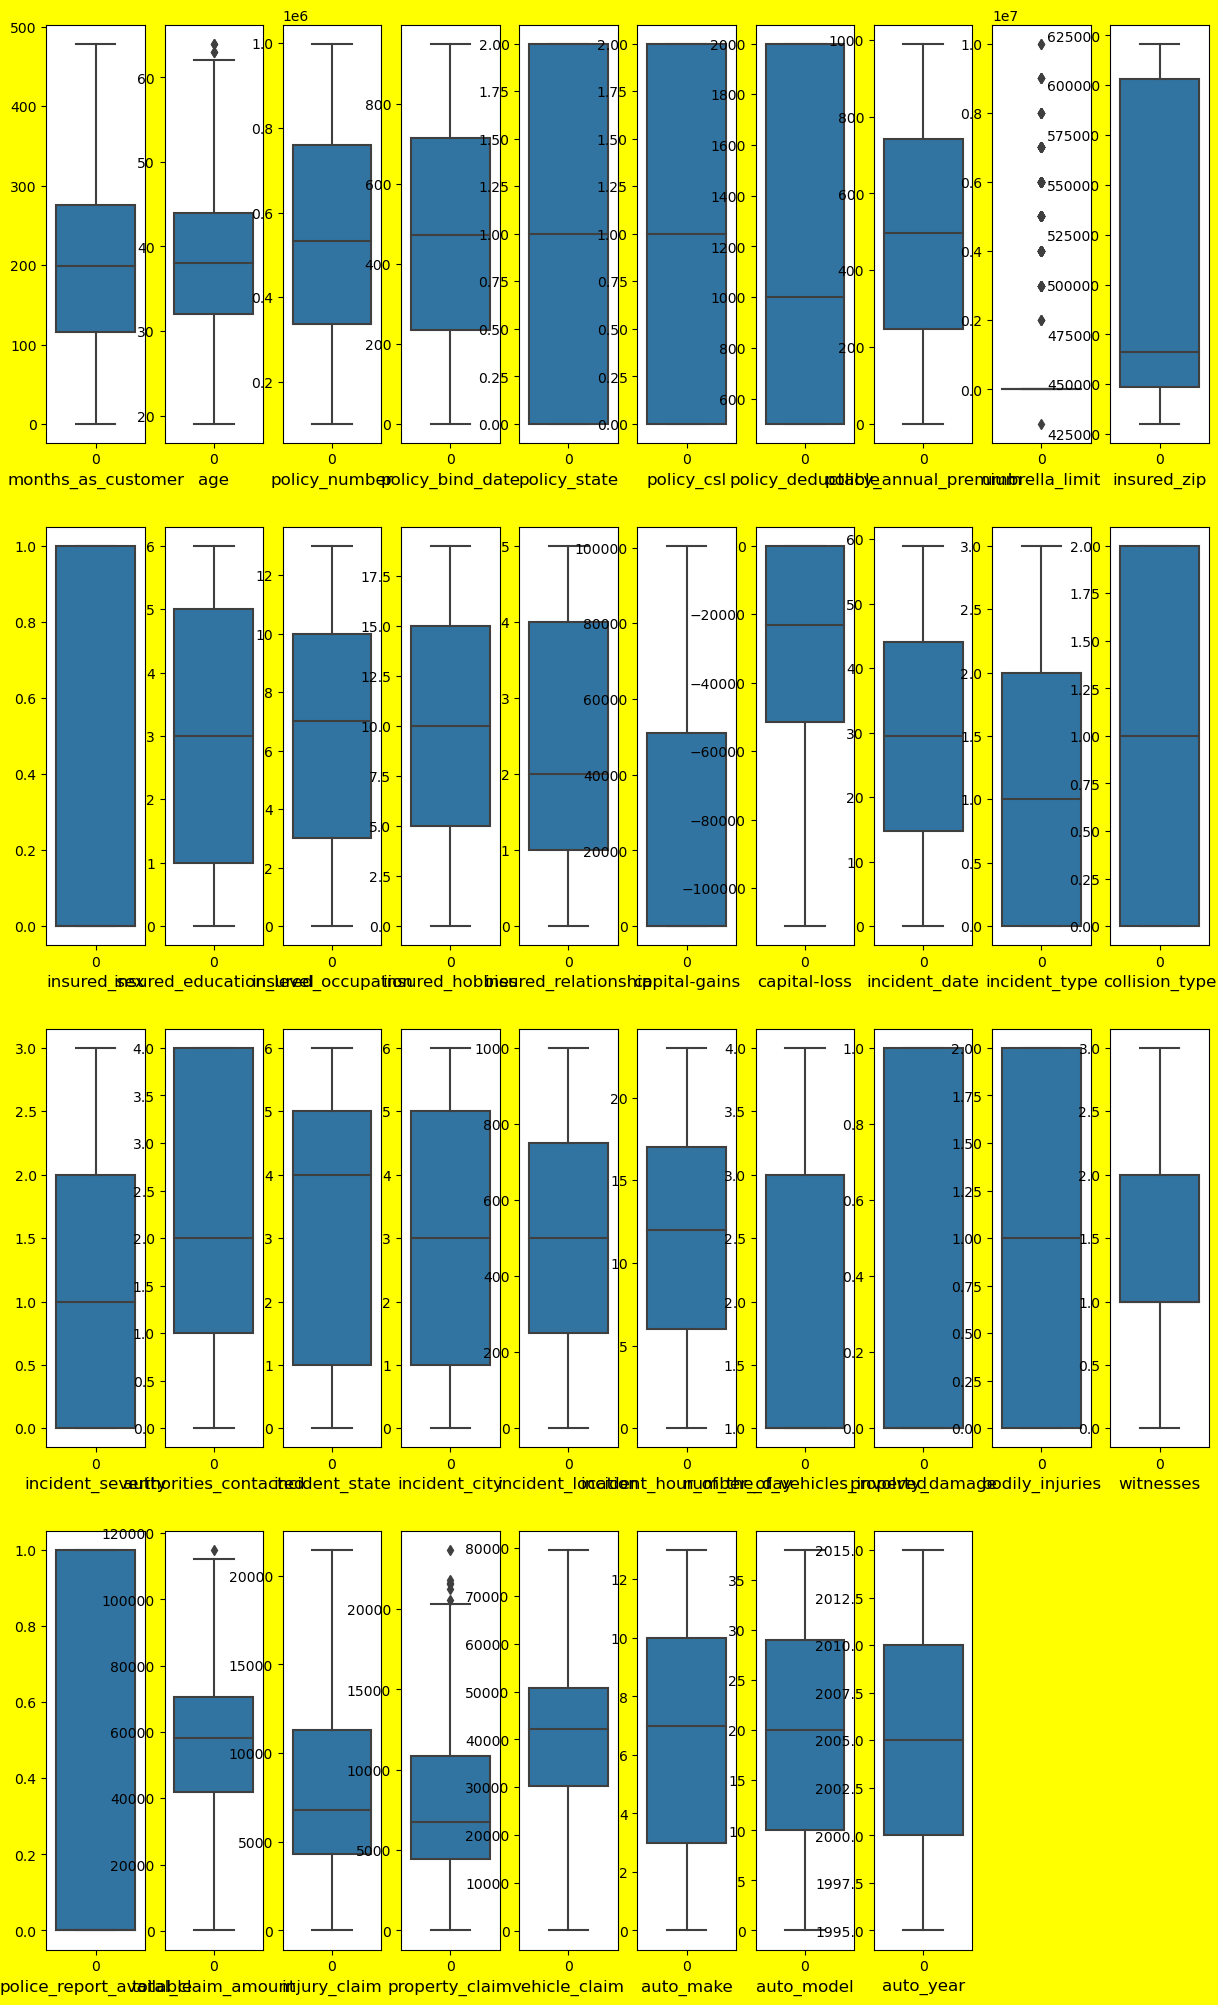

In [88]:
#Checking for outliers
plt.figure(figsize=(15,25), facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<39:
        ax=plt.subplot(4,10, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column, fontsize=12)
    plotnumber+=1
plt.show()    

Few variables like property_claim, claim_amount, age and umbrella_limit have outliers. Thev rest of the variables seem normal.

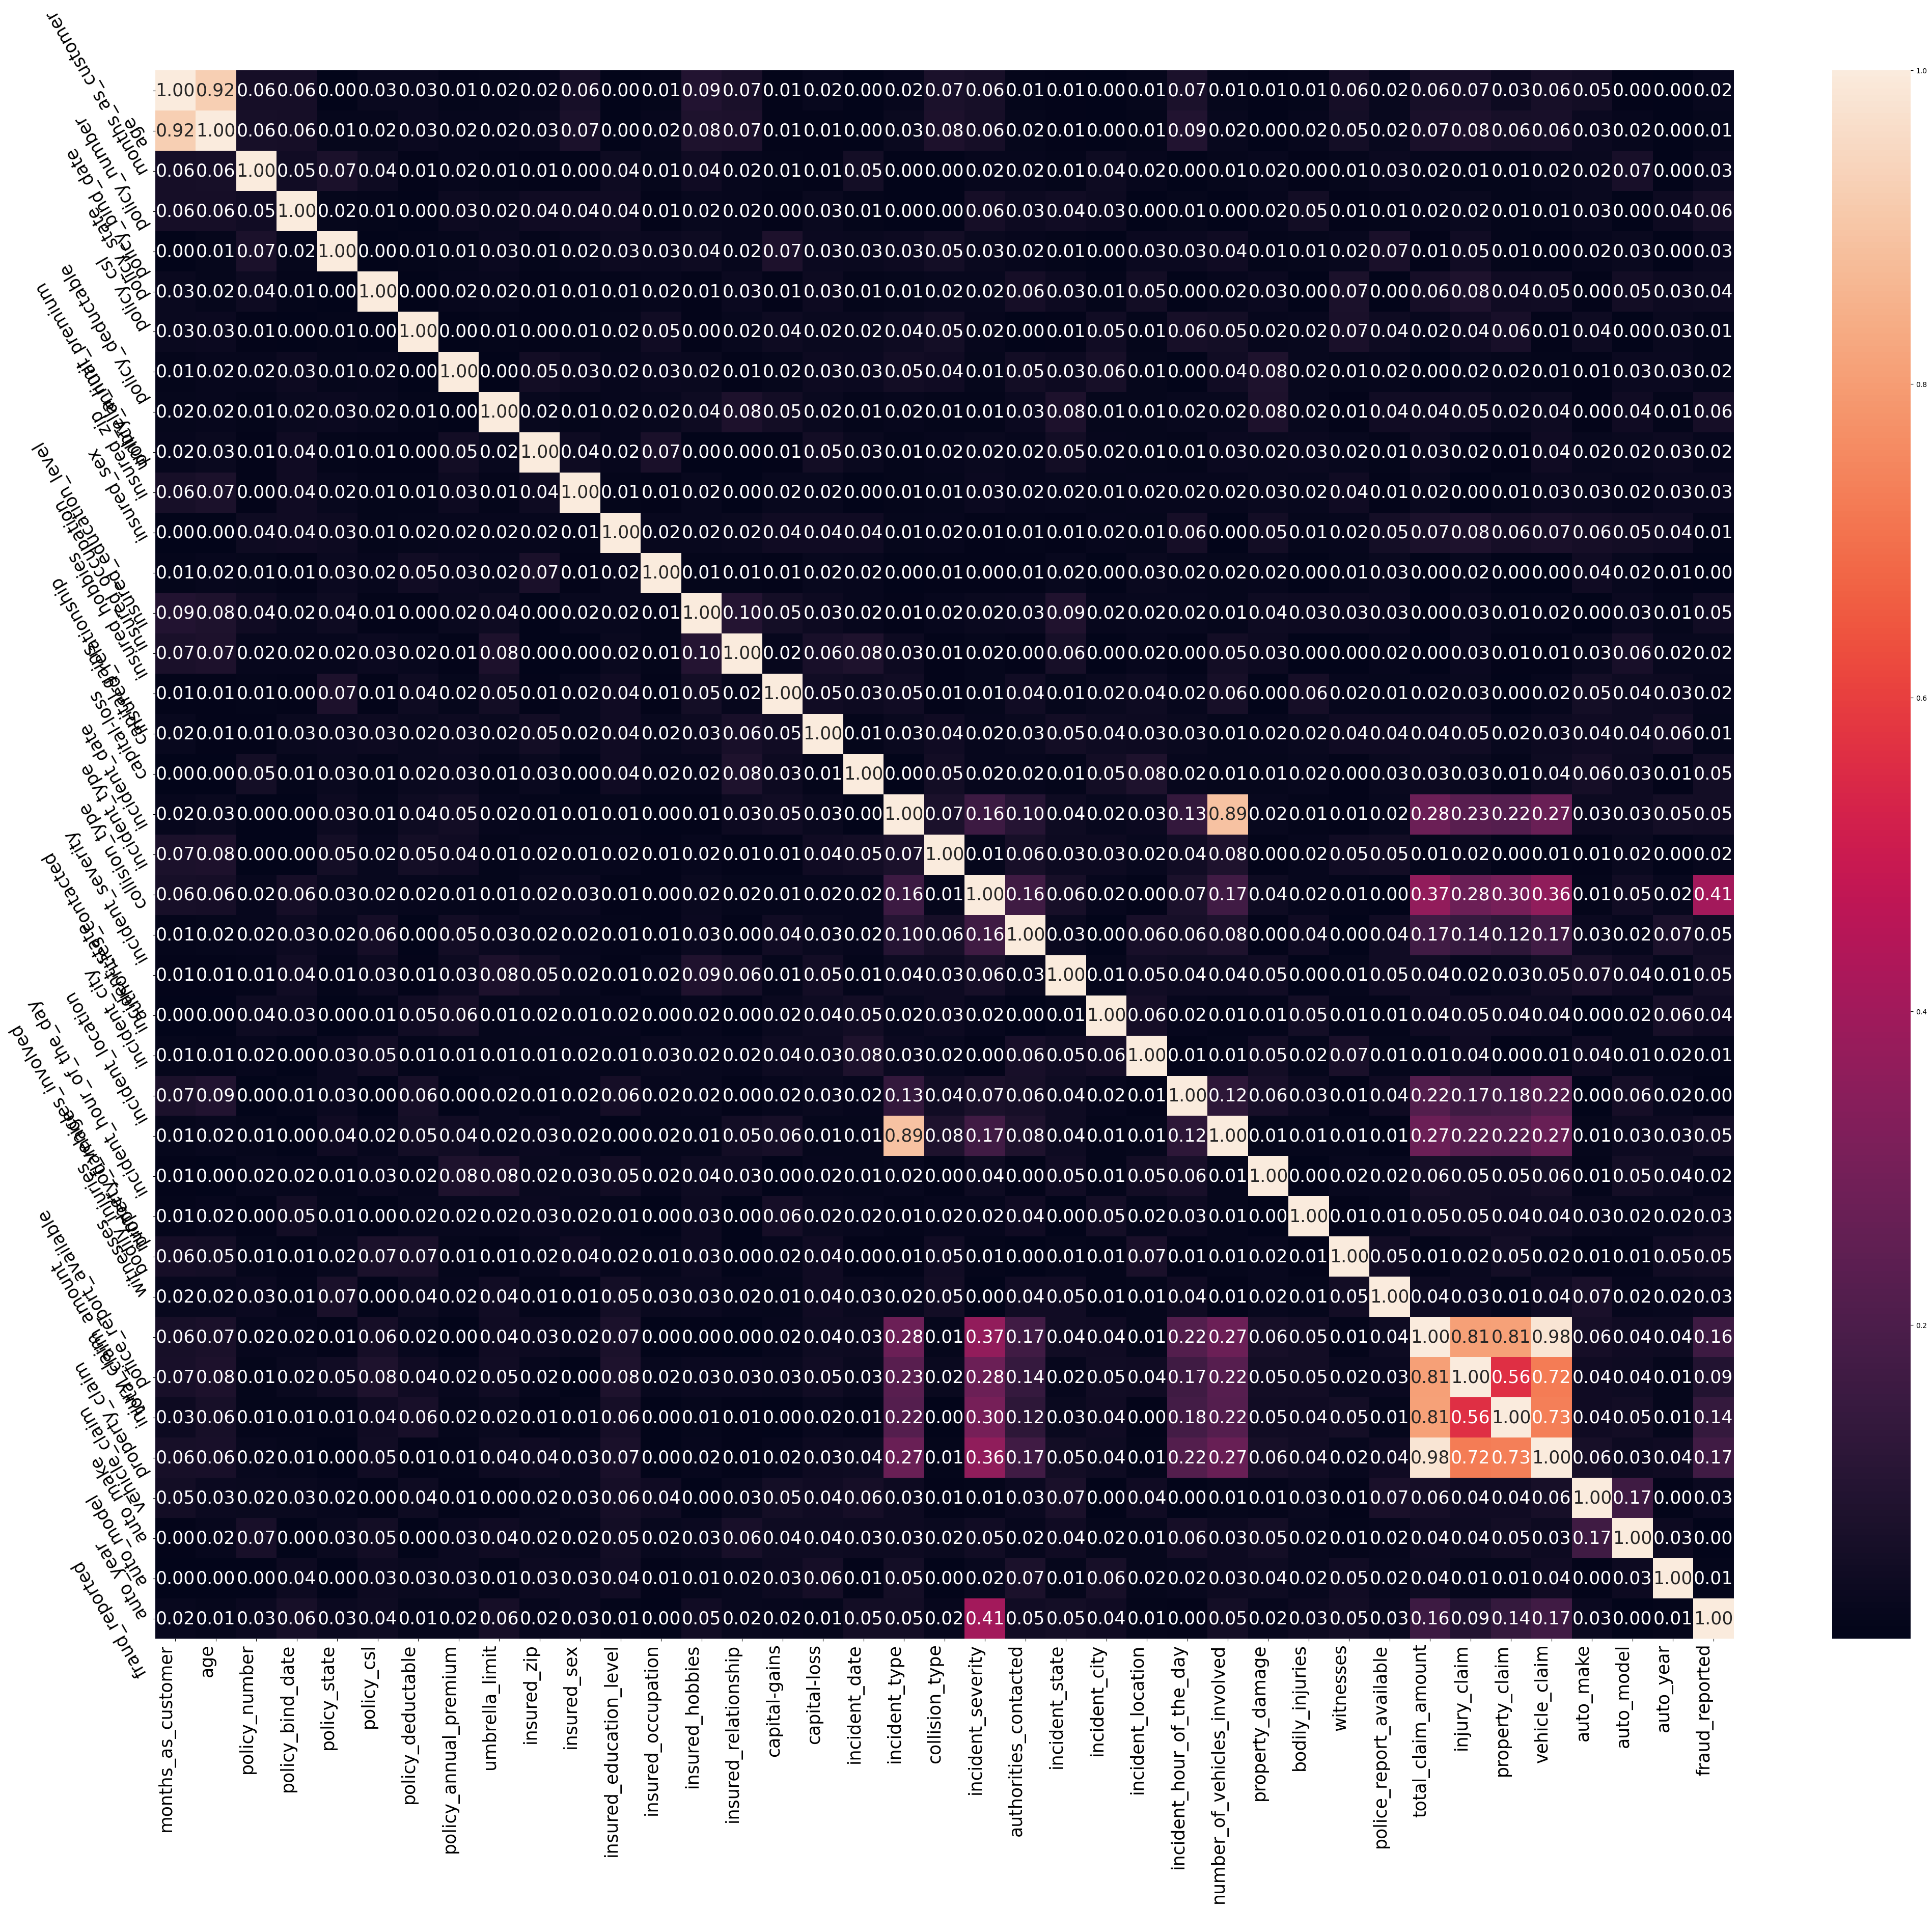

In [95]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(50,40))
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':25})
plt.xticks(rotation=90, ha='right', size=25)
plt.yticks(rotation=120, ha='right', size=25)
plt.show()

In [89]:
#Let's check the impact of each feature on the label(fraud_reported)
data.drop('fraud_reported', axis=1).corrwith(data.fraud_reported)

months_as_customer             0.020544
age                            0.012143
policy_number                 -0.029443
policy_bind_date               0.060642
policy_state                   0.029432
policy_csl                    -0.037190
policy_deductable              0.014817
policy_annual_premium         -0.015261
umbrella_limit                 0.058622
insured_zip                    0.019368
insured_sex                    0.030873
insured_education_level        0.008808
insured_occupation             0.001564
insured_hobbies               -0.046838
insured_relationship           0.021043
capital-gains                 -0.019173
capital-loss                  -0.014863
incident_date                 -0.047726
incident_type                 -0.050376
collision_type                -0.017315
incident_severity             -0.405988
authorities_contacted         -0.045802
incident_state                -0.051407
incident_city                 -0.040403
incident_location             -0.008832


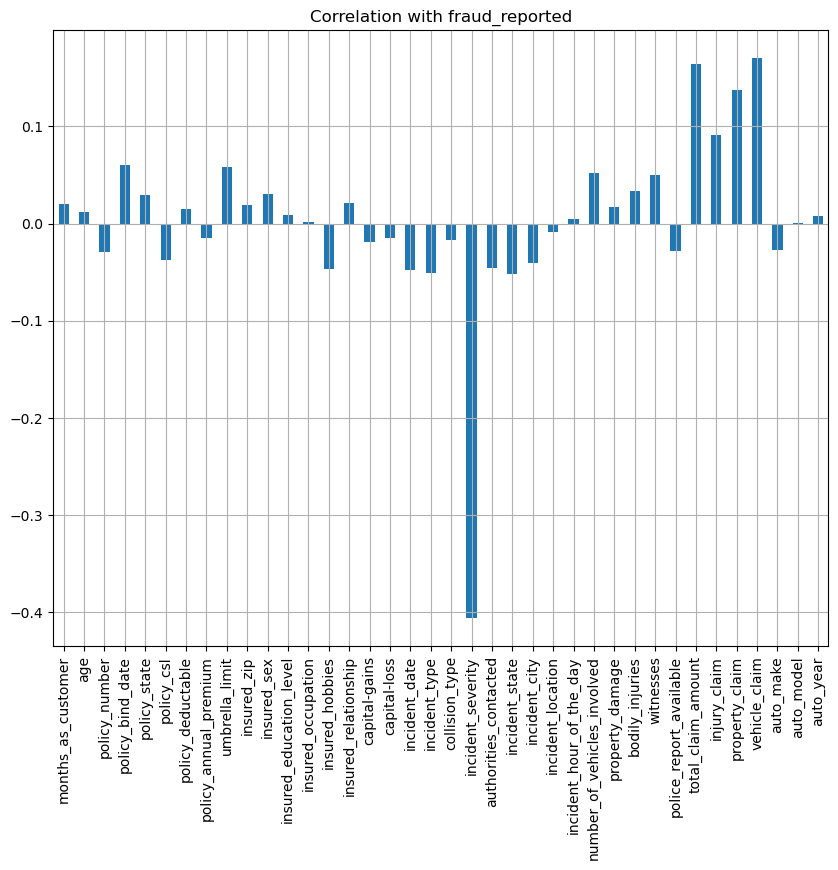

In [90]:
#Let's check the impact of each feature on the label(fraud_reported) graphically.
data.drop('fraud_reported', axis=1).corrwith(data.fraud_reported).plot(kind='bar',grid=True, figsize=(10,8), title='Correlation with fraud_reported')
plt.show()

Clearly, insured_education_level, insured_occupation, incident_location and auto_model seem to be least correlated with the label

In [19]:
#Dropping irrelevant columns-
data.drop(columns=['insured_education_level','insured_occupation','incident_location','auto_model'], inplace=True)

In [20]:
data.shape

(1000, 35)

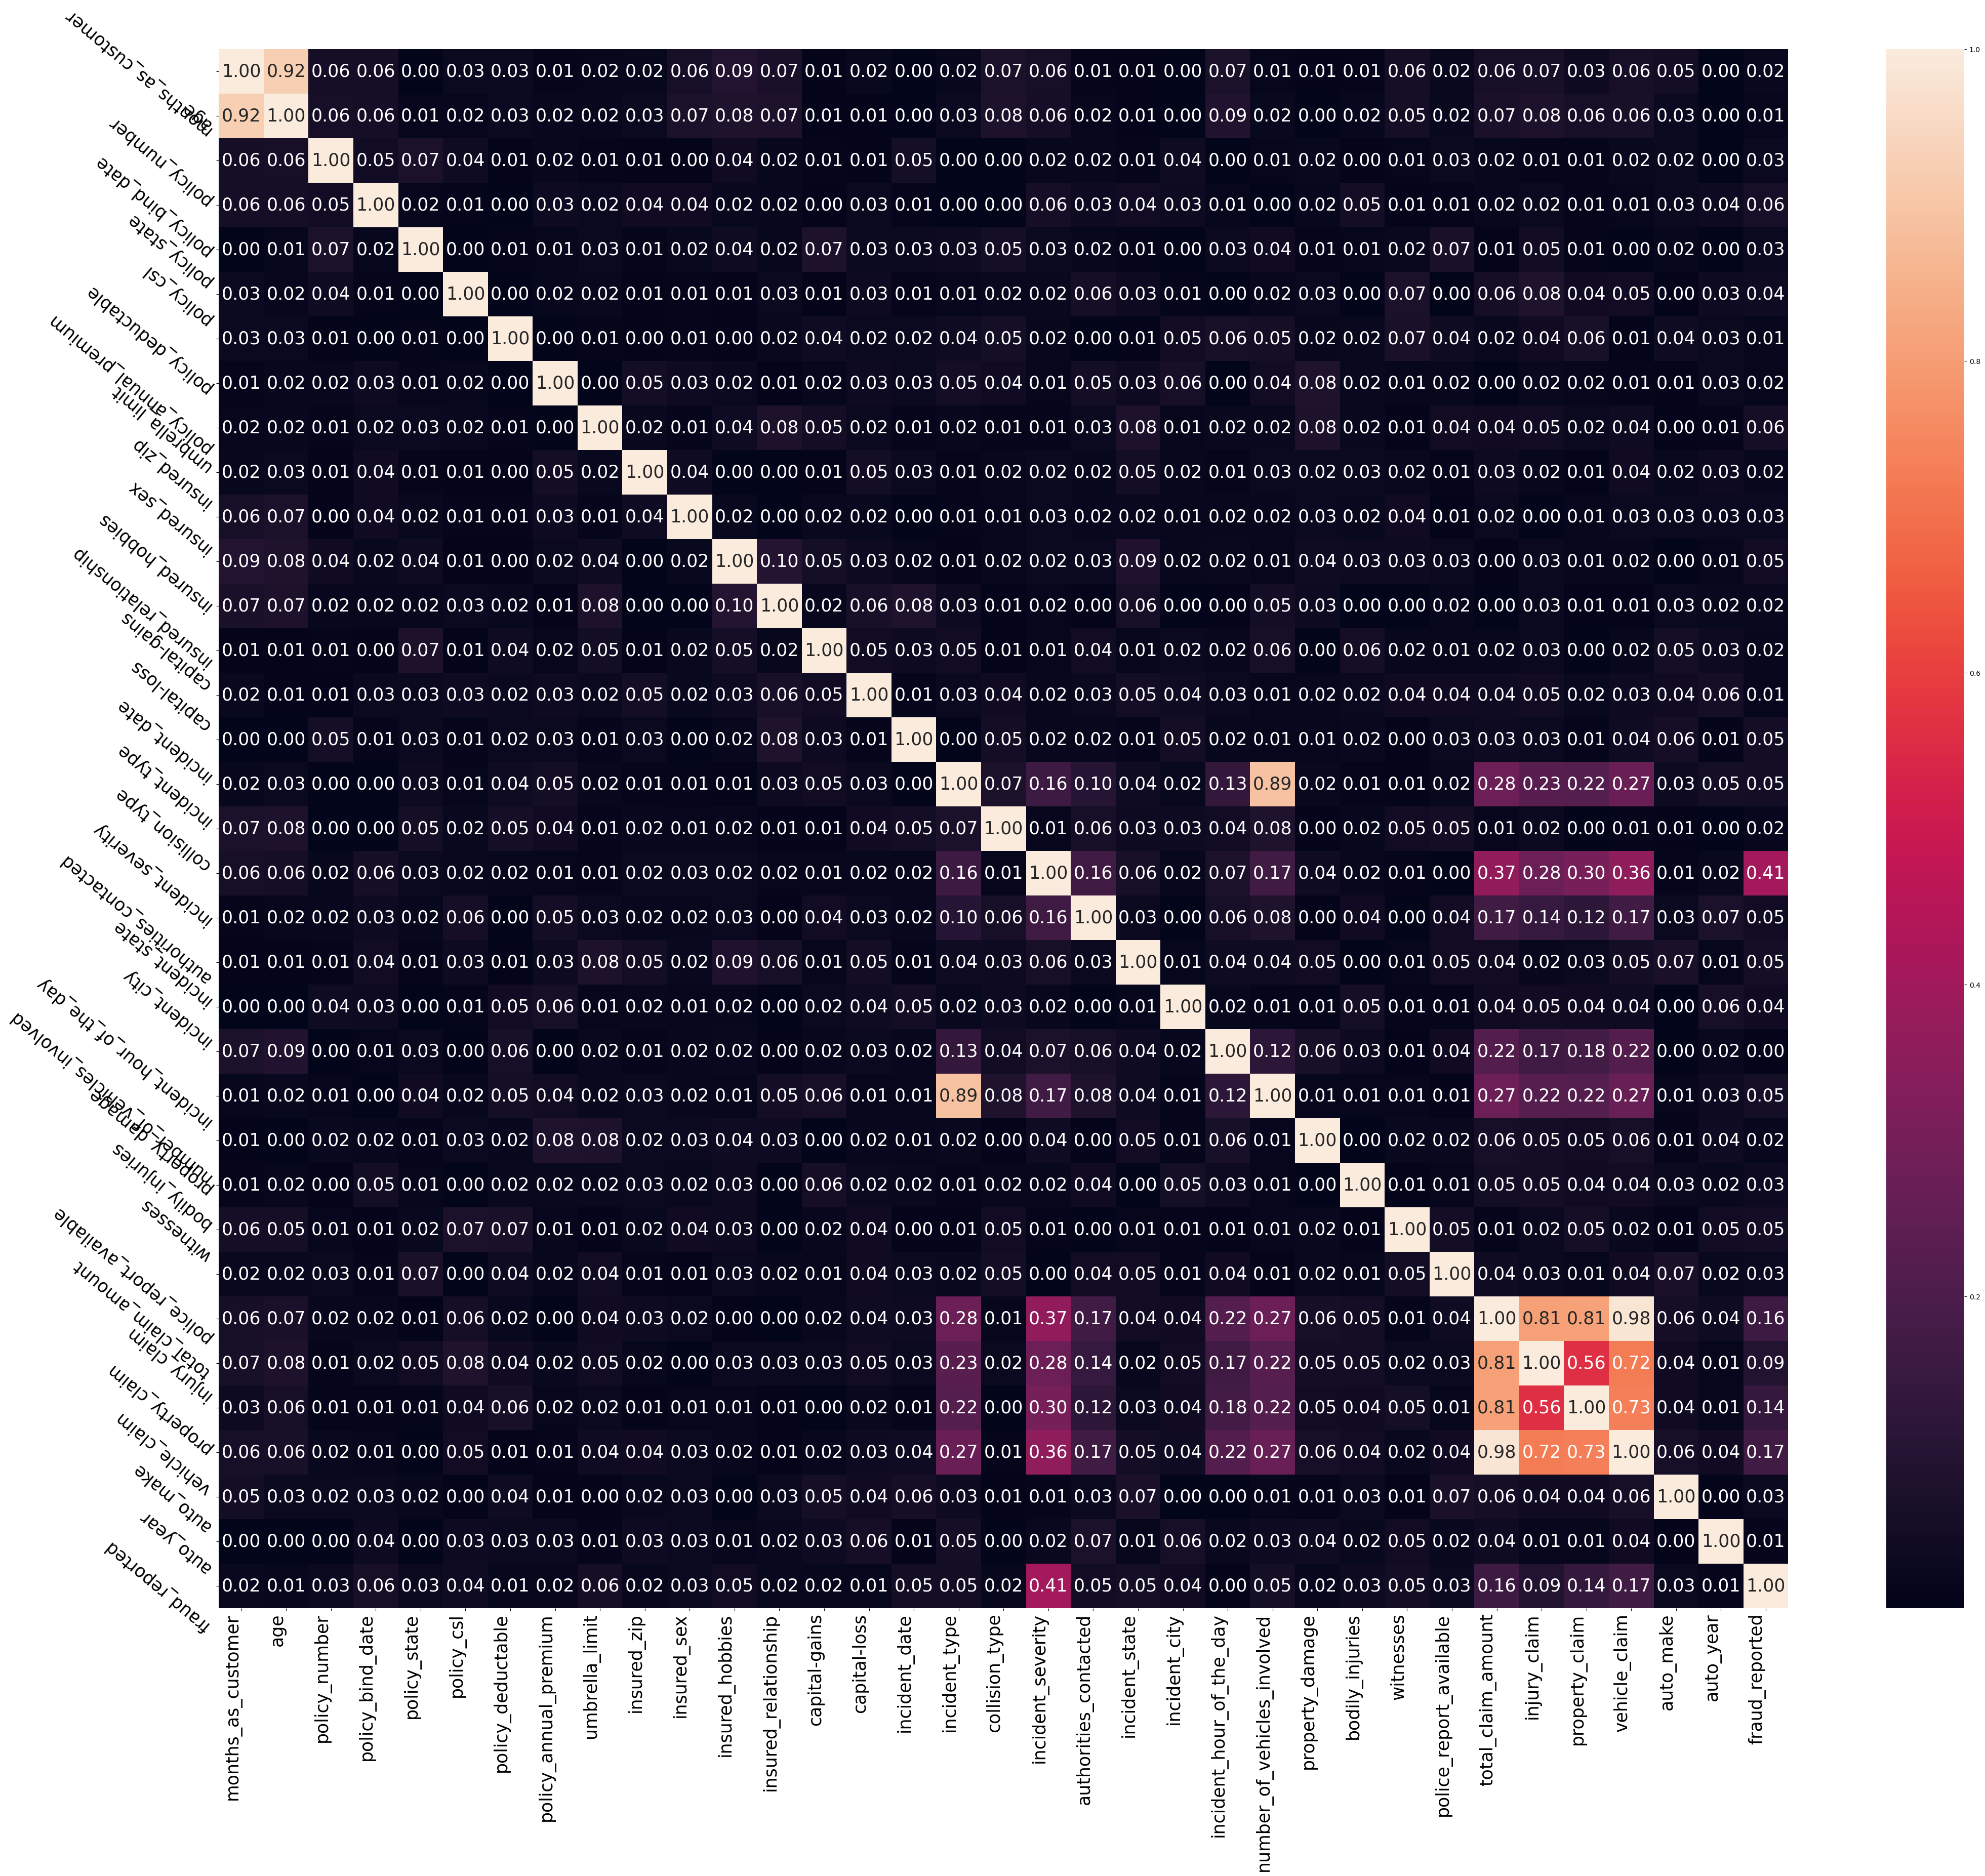

In [99]:
#Checking correlation between features
data_corr=data.corr().abs()
plt.figure(figsize=(50,40))
sns.heatmap(data_corr, annot=True, fmt='0.2f', annot_kws={'size':25})
plt.xticks(rotation=90, ha='right', size=25)
plt.yticks(rotation=140, ha='right', size=25)
plt.show()

Observations-

1.total_claim_amount and property_claim seem to be highly correlated.

2.total_claim_amount and injury_claim seem to be correlated as well.

3.Features like months_as_customer and age are also highly correlated.

4.Feature incident_severity seems to be highly correlated with the label.

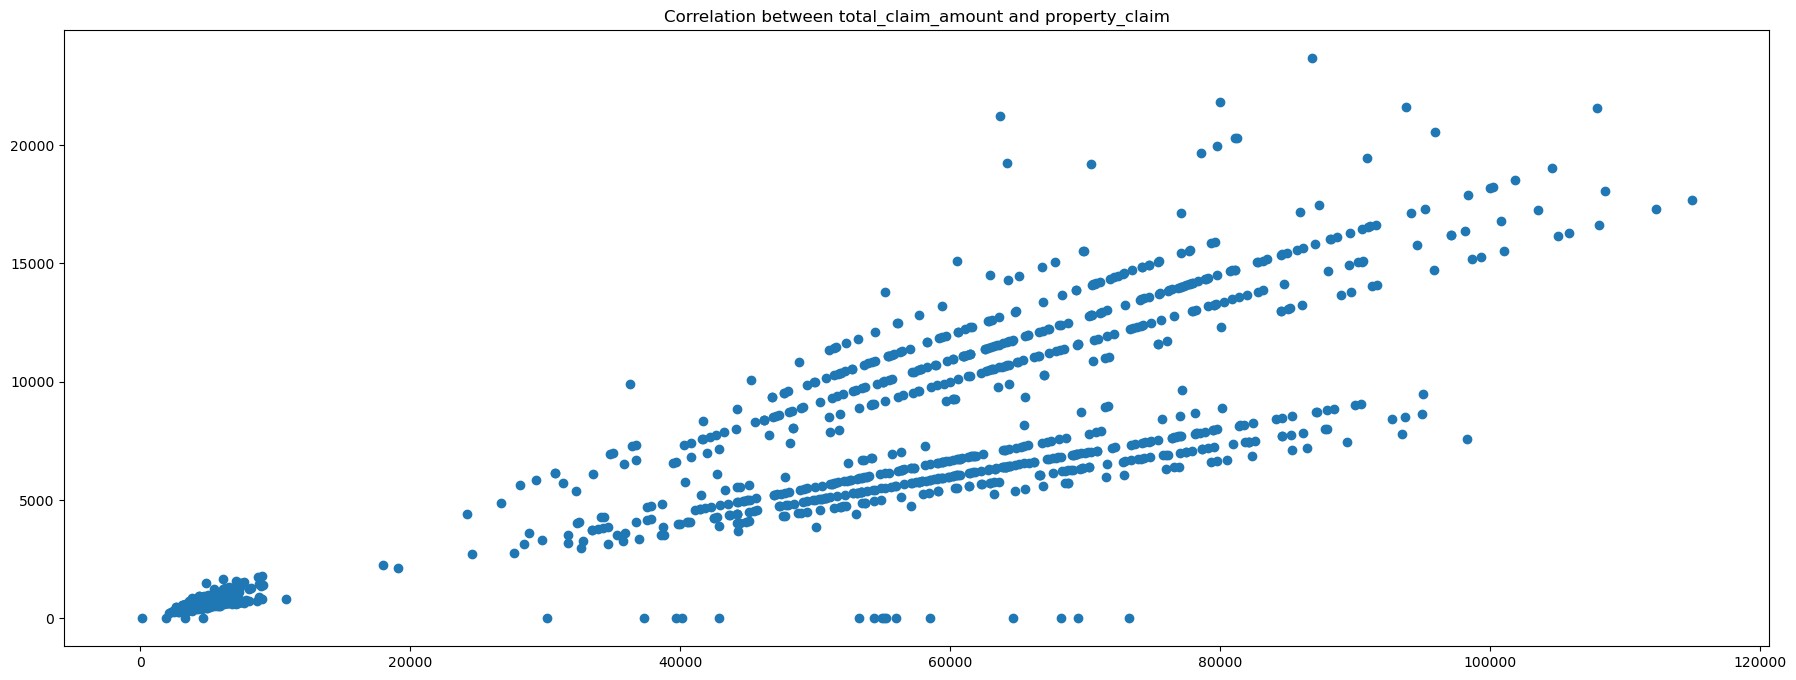

In [101]:
#Correlation between total_claim_amount and property_claim
plt.figure(figsize=(22,8))
plt.scatter(x=data['total_claim_amount'],y=data['property_claim'])
plt.title('Correlation between total_claim_amount and property_claim')
plt.show()

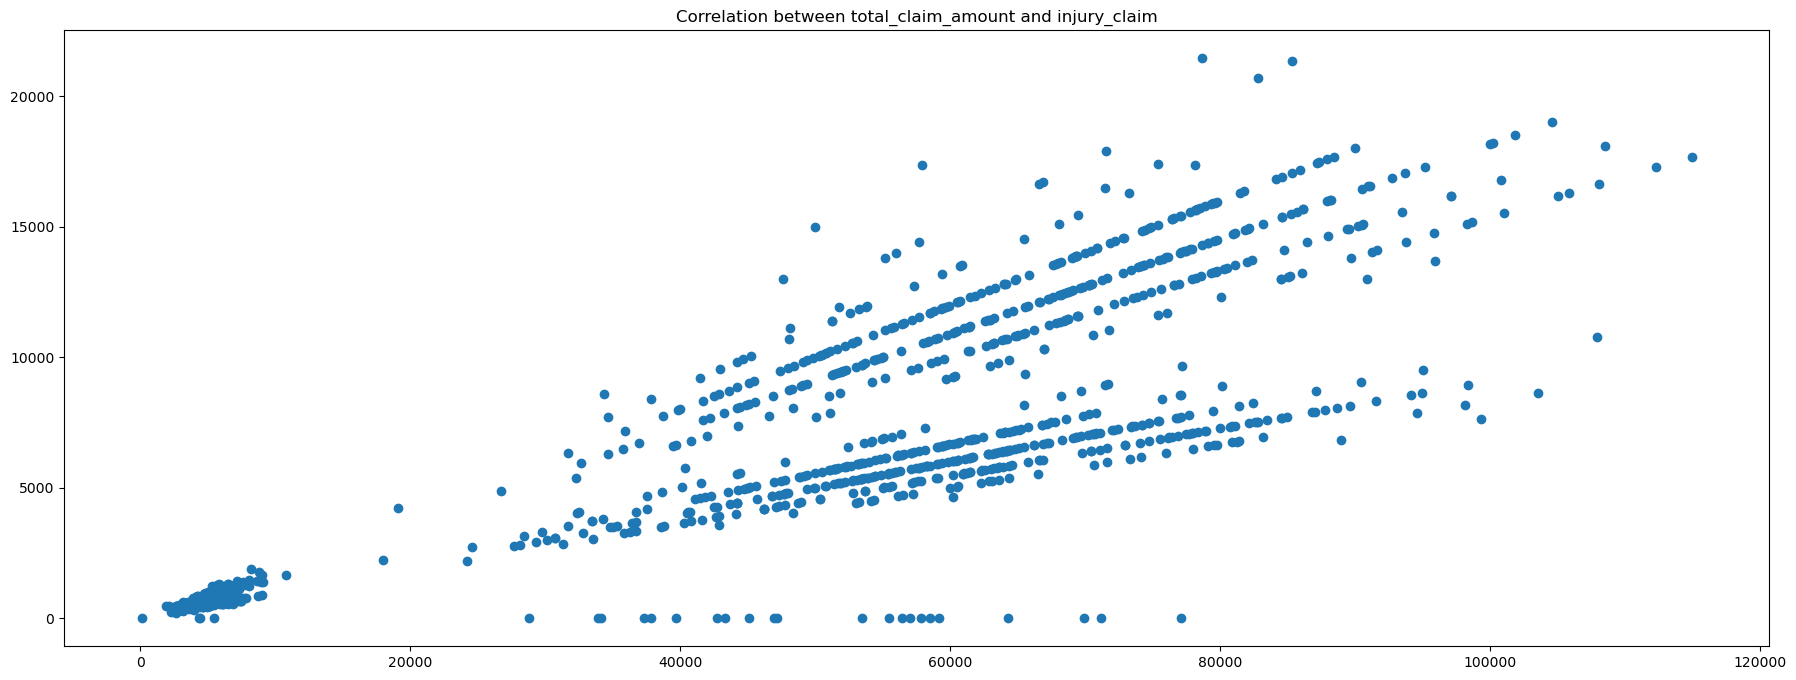

In [102]:
#Correlation between total_claim_amount and injury_claim
plt.figure(figsize=(22,8))
plt.scatter(x=data['total_claim_amount'],y=data['injury_claim'])
plt.title('Correlation between total_claim_amount and injury_claim')
plt.show()

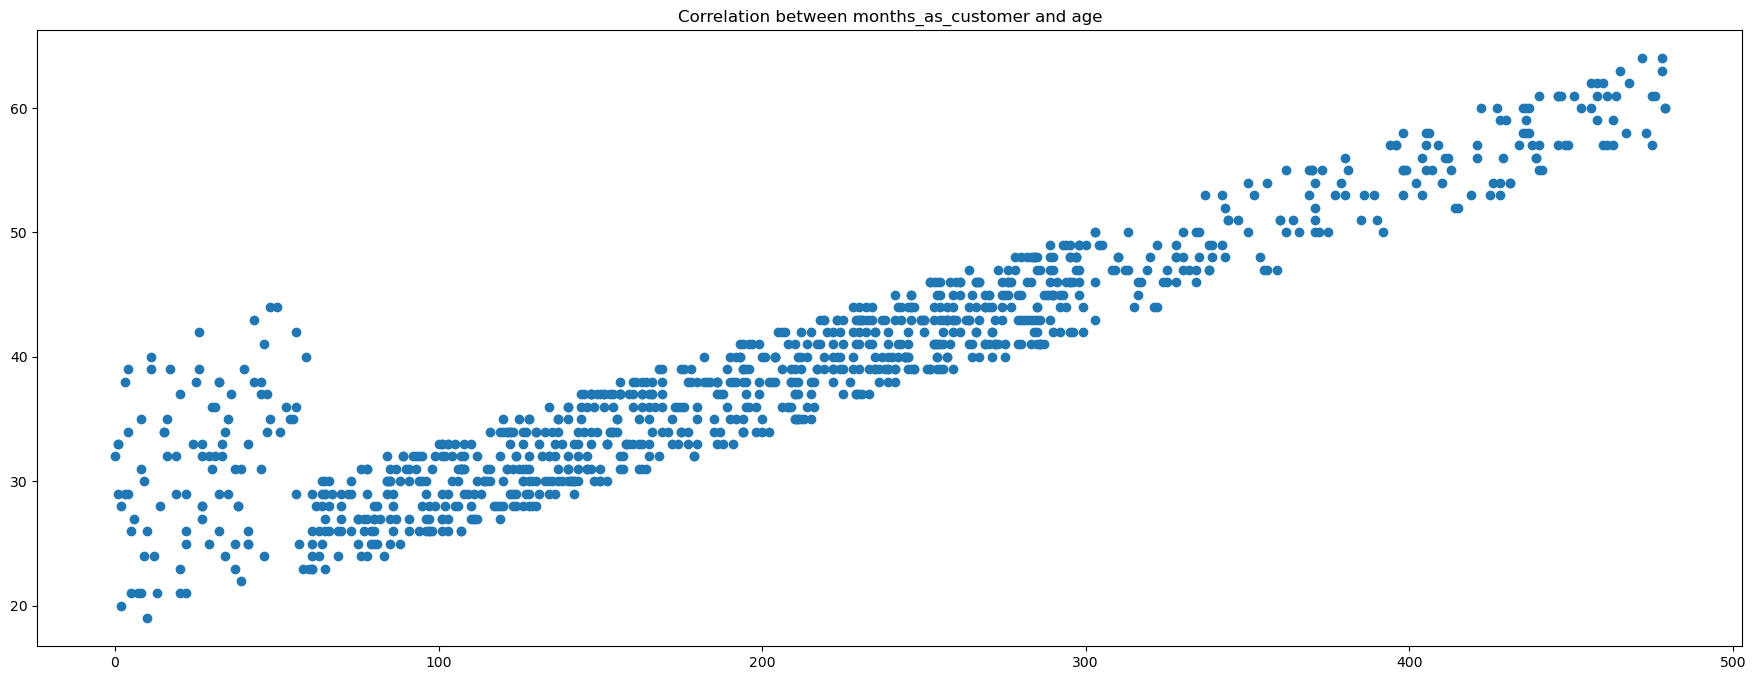

In [103]:
#Correlation between months_as_customer and age
plt.figure(figsize=(22,8))
plt.scatter(x=data['months_as_customer'],y=data['age'])
plt.title('Correlation between months_as_customer and age')
plt.show()

We can see strong positive relation among these features which means there is multi collinearity issue

In [21]:
#Handling outliers
from scipy.stats import zscore

In [22]:
z=np.abs(zscore(data))
abs_z_score=np.abs(z)
filt_ent=(abs_z_score<3).all(axis=1)
data=data[filt_ent]

In [23]:
data.shape

(983, 35)

In [107]:
data.skew()

months_as_customer             0.366978
age                            0.478560
policy_number                  0.039782
policy_bind_date               0.004324
policy_state                  -0.034234
policy_csl                     0.096017
policy_deductable              0.479334
policy_annual_premium         -0.001220
umbrella_limit                 1.806345
insured_zip                    0.831572
insured_sex                    0.140949
insured_hobbies               -0.061328
insured_relationship           0.078645
capital-gains                  0.469129
capital-loss                  -0.373733
incident_date                  0.003394
incident_type                  0.091084
collision_type                -0.031080
incident_severity              0.280436
authorities_contacted         -0.113368
incident_state                -0.152489
incident_city                  0.048398
incident_hour_of_the_day      -0.034313
number_of_vehicles_involved    0.510353
property_damage                0.857869


Skewness is almost normal and data seems to be distributed normally

In [24]:
#Separating features and label
X=data.drop(columns=['fraud_reported'], axis=1)
y=data['fraud_reported']

In [25]:
y

0      1
1      1
2      0
3      1
4      0
5      1
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     1
15     1
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     0
25     1
26     0
27     1
28     0
29     0
30     0
32     0
33     0
34     0
35     1
36     1
37     0
38     0
39     1
40     0
41     1
42     0
43     0
44     0
45     0
46     0
47     1
49     0
50     0
51     0
52     0
53     0
54     0
55     0
56     0
57     0
58     0
59     0
60     1
61     0
62     0
63     1
64     1
65     1
66     1
67     0
68     0
69     0
70     1
71     1
72     0
73     0
74     0
75     0
76     0
77     0
78     0
79     1
80     0
81     0
82     0
83     0
84     1
85     0
86     0
87     0
89     1
90     0
91     1
92     0
93     0
94     0
95     0
96     1
97     1
98     0
99     0
100    0
101    0
102    0
103    0
104    0
105    0
106    1
107    0
108    1
109    1
110    0
111    1
112    0
113    0
1

In [26]:
#Scaling data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [27]:
X_scaled=scaler.fit_transform(X)

In [28]:
X_scaled

array([[ 1.07245795,  0.98604365, -0.09533393, ...,  0.75383424,
         0.85062198, -0.18996904],
       [ 0.20536729,  0.33230203, -0.78908866, ..., -1.82286772,
         0.35453097,  0.30888999],
       [-0.60969793, -1.08413814,  0.5494938 , ..., -0.78359262,
        -0.63765107,  0.30888999],
       ...,
       [-0.64438156, -0.53935346,  1.44549742, ...,  0.77611579,
         1.09866749, -1.52025979],
       [ 2.19967581,  2.51144076, -0.04737353, ..., -0.07058306,
        -1.38178759, -1.1876871 ],
       [ 2.182334  ,  2.29352689,  0.0385709 , ..., -1.813849  ,
         0.35453097,  0.30888999]])

In [29]:
#Handling multicollinearity with PCA
from sklearn.decomposition import PCA
pca=PCA()

In [30]:
pca.fit_transform(X_scaled)

array([[ 8.46476986e-01,  1.07522983e+00, -1.04947688e+00, ...,
        -1.19106967e-01, -3.77491022e-02, -9.53306634e-16],
       [-3.68324404e+00,  8.81265786e-01, -3.30813666e-01, ...,
         5.48000215e-01,  9.69006444e-02,  9.25098028e-16],
       [-7.46584657e-01, -9.02543330e-01,  1.62613339e+00, ...,
         9.16504490e-02, -2.90122627e-01, -1.54530145e-15],
       ...,
       [ 7.74210353e-01, -9.24661203e-01,  1.21544936e+00, ...,
         7.97254698e-02,  1.69834026e-01, -2.87188882e-17],
       [-6.24376414e-01,  3.90013359e+00, -6.92473562e-01, ...,
        -8.41704926e-02,  2.14447557e-01,  1.82353059e-16],
       [-3.10250618e+00,  3.10181112e+00,  1.57337224e+00, ...,
        -6.56411502e-01,  1.08953163e-01, -4.42731808e-16]])

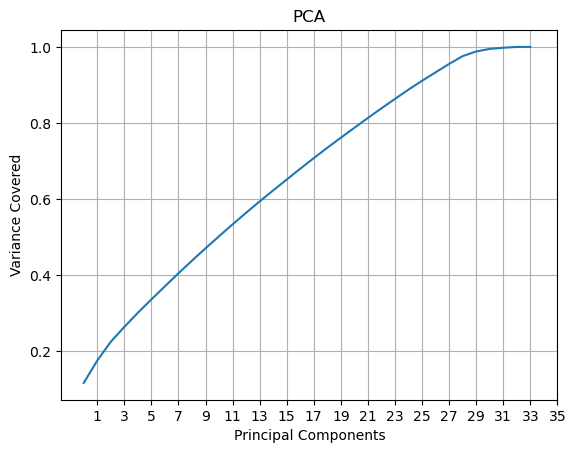

In [116]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.grid(axis='both')
plt.xticks(range(1,36, 2))
plt.xlabel('Principal Components')
plt.ylabel('Variance Covered')
plt.title('PCA')
plt.show()

We can see that at 31 features almost 100% of the variance is being covered so, this is the best number of features we can go ahead with.

In [31]:
pca=PCA(n_components=31)
new_comp=pca.fit_transform(X_scaled)

In [32]:
princi_comp=pd.DataFrame(new_comp)

In [33]:
princi_comp

0         1         2         3         4         5         6   \
0    0.846477  1.075230 -1.049477 -3.088185  1.357463  0.660024 -0.541421   
1   -3.683244  0.881266 -0.330814  0.241790 -0.492912 -1.265938 -0.591367   
2   -0.746585 -0.902543  1.626133  1.480946 -0.726974  1.952442  0.634114   
3   -0.030596  1.210252 -1.005431  2.281829 -1.760450  0.121289  0.724303   
4   -3.213041  1.330789 -0.169935  2.163028  0.155532  1.441541  0.481615   
5    1.360267  0.251896  1.225867  1.171338  0.509813  0.278295 -0.715109   
6    2.018516 -1.063935  0.423145  0.993649 -1.269717 -0.471016 -0.297870   
7    0.572500  0.000809  1.292725  1.467098 -0.273249  1.148742 -1.384335   
8   -2.452191 -1.018045 -0.347458 -0.478603  0.779978  0.589898 -0.189881   
9   -1.264653  1.055437 -0.806043  2.001128  0.529015  0.479198  1.103189   
10   1.601924  0.738315 -2.207844  1.086698  0.079483  0.326786  0.454700   
11   5.555092  2.523192 -0.468772 -0.849859  0.140562 -0.369222 -1.190157   
12  -0.694032 -1.758648 -1.610128 -0.325267  0.577848 -0.037077  1.238607   
13  -2.956065 -0.348024  0.724379  0.218606 -1.687384 -0.775502  1.724092   
14  -1.061079  0.142288 -0.832676 -1.441000 -1.699120  0.601495 -1.714515   
15   2.242691  2.234553  2.050585 -1.048495  2.290526 -1.500393 -0.587800   
16  -0.003606 -1.718049  1.575537  0.074411 -1.020687  2.614049  1.463680   
17   0.313476 -0.873946 -0.997324 -0.034603 -2.826993 -0.076460 -0.379693   
18   0.659553 -0.848551 -1.384802 -1.128419  0.219381 -0.108667 -0.142740   
19   0.700857 -0.645092  1.877973 -0.269024 -0.308057  0.933476  0.348226   
20   0.039890  3.472376  2.433552  2.512227  0.191117  0.408848 -0.043171   
21  -0.887119 -0.204016  2.254427  0.683430  0.153327 -1.690297 -1.666530   
22   2.921684  1.758997  1.474541 -1.103415 -0.501929 -2.537249  0.230906   
23   2.450958  2.572690 -1.927619  0.393217 -0.726872 -0.891468 -0.617062   
24   0.958133  0.178045 -1.457947 -0.777300 -0.973052 -0.842786 -0.594507   
25   2.312564 -1.348975  0.669195  0.307858  0.185063  1.735823 -1.203171   
26  -2.849967  1.338518  0.718025 -1.476635  0.160331  0.469859 -1.045472   
27  -3.493280  0.161308 -0.500028  0.153779  0.595096 -0.206129  1.669111   
28   1.126106 -0.015679 -1.216998 -1.013756 -0.354075  1.385050 -0.877125   
29   1.879925  0.772793 -1.913887  1.699297 -1.354040  0.107486 -1.341081   
30   2.791089 -2.566496  2.049577 -1.094174  1.105036 -2.003454  0.370913   
31  -1.189667 -0.987426  2.120069  0.603041  1.683808 -0.085618  0.143676   
32   2.542327 -1.327172  0.462989  0.818091 -0.850075 -0.933751  2.170544   
33   0.082419 -0.539037 -1.491083 -0.954331  2.206127  0.586844 -1.608537   
34  -0.003917 -0.805993 -1.872955 -1.450207  0.050182  0.803633  1.630223   
35  -0.854403 -1.570248 -1.335803  1.930628 -0.838117 -0.071555 -0.451399   
36  -2.773793  1.659290  1.184627 -0.655552  0.989016  1.021633 -0.361460   
37   1.430347  2.337587  1.822731  0.718329  0.476572  0.283410  1.353049   
38   0.570533  0.493192 -1.208024  0.334809 -0.209996 -1.470240  1.405161   
39  -0.885962 -1.690085 -1.104572  0.660020 -0.161433 -1.026064 -0.433292   
40   2.323729 -0.655592 -2.713187  0.566090 -0.576153  0.087647 -0.632277   
41   0.228271 -2.871503  1.076174 -0.389921  0.042654 -0.528704 -1.276833   
42  -0.773188 -1.181008 -0.581143 -0.086209 -1.330977 -0.410455  1.253947   
43   0.457230  1.075772 -1.142460  0.381223 -0.612826 -1.770623 -0.924970   
44   0.081466 -0.140300  1.486597  0.515015  1.495910 -0.759520 -1.117459   
45   1.424290 -1.595755  0.956302  0.486681  1.698281 -0.547993  0.324485   
46   1.415657  1.498846  1.288820 -0.227051  0.103891 -0.379054 -0.303987   
47   0.981003 -0.313129 -1.937503  1.065305 -0.760507 -1.496722 -0.417936   
48   2.879848  3.334600  0.613462  1.332065 -1.080854  2.153065 -0.655002   
49  -4.018468 -1.384921 -0.345276  1.205053  1.224722 -1.426922 -0.828068   
50  -3.579036  0.571123 -0.513297 -0.957086  1.605663  1.986935  0.361667   
51   2.

In [34]:
#Splitting data into train and test
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test=train_test_split(princi_comp, y, test_size=0.25, random_state=80)

In [36]:
y_train

908    0
688    0
97     1
205    0
849    0
865    1
933    0
803    1
117    1
897    0
154    1
178    0
597    1
815    0
774    0
470    1
315    0
572    0
666    1
396    0
359    0
951    0
523    0
221    0
901    0
165    0
567    1
997    0
491    0
431    0
451    0
41     1
879    0
300    0
540    0
623    1
333    0
831    1
554    0
28     0
676    0
550    0
363    1
335    0
407    0
236    0
42     0
642    0
102    0
139    0
331    1
66     1
561    1
206    1
661    0
94     0
237    1
459    0
770    0
410    0
420    0
443    0
15     1
626    0
214    1
175    0
926    1
543    0
325    0
819    0
220    1
134    0
488    0
370    0
143    1
784    1
6      0
98     0
316    0
586    0
59     0
589    0
381    0
637    0
957    0
515    0
983    0
2      0
352    0
76     0
606    0
809    1
408    0
113    0
906    0
140    0
441    0
754    0
247    1
900    0
291    0
738    0
99     0
270    0
714    0
250    1
108    1
538    1
786    0
860    0
663    0
8

In [37]:
#Handling imbalanced data
from collections import Counter
from imblearn.over_sampling import SMOTE

In [38]:
Counter(data['fraud_reported'])

Counter({1: 241, 0: 742})

In [39]:
Counter(y_train)

Counter({0: 547, 1: 190})

In [40]:
over_smp=SMOTE(random_state=80, k_neighbors=3, sampling_strategy=0.75)

In [41]:
X_train_ns,y_train_ns= over_smp.fit_resample(X_train,y_train)

In [42]:
Counter(y_train_ns)

Counter({0: 547, 1: 410})

In [43]:
#Let's start with classification model first-
#Writing one function to call it for multiple models

def metric_score(clf, X_train, X_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(X_train)
        print("\n---------------Train Result-------------")
        print(f"Accuracy Score:{accuracy_score(y_train,y_pred)*100:.2f}%")
              
    elif not train:
              pred=clf.predict(X_test)
              print("\n---------------Test Result-------------")
              print(f"Accuracy Score:{accuracy_score(y_test,pred)*100:.2f}%")

In [44]:
#Using K Neighbors Classifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

In [131]:
knn.fit(X_train_ns,y_train_ns)

KNeighborsClassifier()

In [132]:
metric_score(knn,X_train, X_test, y_train, y_test, train=True)
metric_score(knn,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:68.79%

---------------Test Result-------------
Accuracy Score:58.54%


In [45]:
#Using Cross validation to see if model is overfitting/stable model
from sklearn.model_selection import cross_val_score

In [134]:
for k in range(3,6):
    cv_score=cross_val_score(knn,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.6856772581487283


 at 4, cross val score is 0.711100049776008


 at 5, cross val score is 0.7070185434579923




In [46]:
#Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [47]:
rf.fit(X_train_ns,y_train_ns)

RandomForestClassifier()

In [48]:
metric_score(rf,X_train, X_test, y_train, y_test, train=True)
metric_score(rf,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:77.24%


In [138]:
for k in range(3,6):
    cv_score=cross_val_score(rf,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7710959449044031


 at 4, cross val score is 0.7751908080305293


 at 5, cross val score is 0.7772143375116544




In [139]:
#Using Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbdt=GradientBoostingClassifier()

In [140]:
gbdt.fit(X_train_ns,y_train_ns)

GradientBoostingClassifier()

In [141]:
metric_score(gbdt,X_train, X_test, y_train, y_test, train=True)
metric_score(gbdt,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:97.56%

---------------Test Result-------------
Accuracy Score:74.39%


In [142]:
for k in range(3,6):
    cv_score=cross_val_score(gbdt,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.8240347082369907


 at 4, cross val score is 0.8240501078480174


 at 5, cross val score is 0.8321920646431161




In [143]:
import xgboost as xgb
xgb=xgb.XGBClassifier()

In [144]:
xgb.fit(X_train_ns,y_train_ns)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [145]:
metric_score(xgb,X_train, X_test, y_train, y_test, train=True)
metric_score(xgb,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:72.36%


In [146]:
for k in range(3,6):
    cv_score=cross_val_score(xgb,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.819954128440367


 at 4, cross val score is 0.831159780985565


 at 5, cross val score is 0.8270848440899201




In [147]:
#Using SVC
from sklearn.svm import SVC
svc=SVC()

In [148]:
svc.fit(X_train_ns,y_train_ns)

SVC()

In [149]:
metric_score(svc,X_train, X_test, y_train, y_test, train=True)
metric_score(svc,X_train, X_test, y_train, y_test,train=False)


---------------Train Result-------------
Accuracy Score:100.00%

---------------Test Result-------------
Accuracy Score:72.36%


In [150]:
for k in range(3,6):
    cv_score=cross_val_score(svc,X,y,cv=k)
    cv_mean=cv_score.mean()
    print(f" at {k}, cross val score is {cv_mean}")
    print("\n")

 at 3, cross val score is 0.7548326744735337


 at 4, cross val score is 0.7548324207731874


 at 5, cross val score is 0.7548326944991194




We are getting the best accuracy score 77.24% with Random Forest Classifier model. The cross validation score at cv=5 is 77.7%.
Other model which is again performing well is GradientBoostingClassifier model with accuracy score of 74.39% however, Random Forest Classifier model has a higher score.
We can conclude that Random Forest Classifier model is the best fitted model as it works great on test data and has best CV score as well.

In [49]:
#Let's use hyperperameter tuning technique to stabilize model and to generalize it for unseen data.
from sklearn.model_selection import GridSearchCV

In [50]:
param_grid={'max_depth':[40,50,70],
             'n_jobs':[1, 2],
             'n_estimators':[50,100],
            'criterion':['gini','entropy']
            }

In [51]:
gridsearch=GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [52]:
gridsearch.fit(X_train_ns,y_train_ns)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [40, 50, 70], 'n_estimators': [50, 100],
                         'n_jobs': [1, 2]})

In [53]:
gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 50, 'n_estimators': 100, 'n_jobs': 2}

In [54]:
Final_model=RandomForestClassifier(criterion='gini', max_depth= 50,n_jobs=2,n_estimators=100)

In [55]:
Final_model.fit(X_train_ns,y_train_ns)

RandomForestClassifier(max_depth=50, n_jobs=2)

In [57]:
pred=Final_model.predict(X_test)

In [58]:
acc=accuracy_score(y_test,pred)
print(acc*100)

76.01626016260163


In [59]:
#Predicting Fraud reported
y_pred = Final_model.predict(X_test)
data_n = pd.DataFrame({'Actual' : y_test, 'RF predicted': y_pred})

In [60]:
data_n

Actual  RF predicted
290       0             0
416       0             0
656       0             0
263       0             1
698       0             0
246       0             0
973       1             0
859       0             0
422       0             0
672       0             0
898       0             0
876       0             0
647       0             0
757       0             0
990       0             0
149       1             0
229       0             1
412       0             0
599       0             1
223       0             0
519       0             0
296       0             0
513       1             0
485       0             0
452       0             0
886       0             0
998       0             1
369       0             0
437       1             0
955       0             0
684       1             1
755       0             1
123       0             0
548       0             0
182       0             0
869       1             1
573       1             0
368       1             0
837       1             0
394       1             1
743       1             0
301       0             0
272       1             1
209       0             0
455       0             0
89        1             1
824       0             0
360       1             0
19        0             1
5         1             1
576       0             0
909       0             0
107       0             1
528       0             0
846       0             0
959       0             0
292       1             0
421       0             0
393       0             0
820       0             0
22        1             0
736       0             0
989       0             0
735       0             0
240       0             0
44        0             0
40        0             0
480       0             0
673       0             0
517       1             0
596       0             0
100       0             0
761       1             0
267       0             0
358       1             1
739       0             0
583       0             0
925       0             0
660       0             0
725       0             0
968       0             1
630       0             0
741       0             0
711       0             0
965       0             1
565       0             0
285       0             0
718       0             0
921       0             0
188       1             1
733       0             0
453       0             0
713       1             0
578       0             0
787       0             0
827       0             0
276       0             0
355       0             0
125       0             0
55        0             0
747       0             0
671       0             1
255       0             1
840       0             0
387       0             0
37        0             0
477       1             0
939       1             0
693       0             0
141       0             0
508       0             0
144       0             0
283       1             1
541       0             0
303       0             0
629       1             0
354       0             0
448       0             0
203       0             0
864       0             0
497       0             0
750       0             0
219       0             0
617       0             0
580       0             0
810       0             0
260       0             0
792       0             0
299       0             1
836       0             0
465       0             1
411       0             0
217       0             0
79        1             0
532       0             0
122       1             0
330       0             0
128       1             0
12        0             0
233       0             1
674       0             0
885       0             0
712       1             1
604       0             0
160       0             0
449       0             1
652       1             0
558       1             0
163       1             0
980       0             0
348       0             0
190       0             0
374       0             0
9